In [2]:
import pandas as pd
import numpy as np

# Load the datasets
dataset_1 = pd.read_csv('Dataset_1.csv')
dataset_2 = pd.read_excel('Dataset_2.xlsx')

In [3]:
# Display the first few rows of each dataset
print("Dataset 1:")
print(dataset_1.head())

print("\nDataset 2:")
print(dataset_2.head())

# Display summary statistics
print("\nSummary Statistics for Dataset 1:")
print(dataset_1.describe())

print("\nSummary Statistics for Dataset 2:")
print(dataset_2.describe())


Dataset 1:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  weathersit  \
0        1  01-01-2011       1   0     1   0    False        6           1   
1        2  01-01-2011       1   0     1   1    False        6           1   
2        3  01-01-2011       1   0     1   2    False        6           1   
3        4  01-01-2011       1   0     1   3    False        6           1   
4        5  01-01-2011       1   0     1   4    False        6           1   

   temp  
0  0.24  
1  0.22  
2  0.22  
3  0.24  
4  0.24  

Dataset 2:
   Unnamed: 0  instant   atemp   hum  windspeed  casual  registered  cnt
0           0        1  0.2879  0.81        0.0       3          13   16
1           1        2  0.2727  0.80        0.0       8          32   40
2           2        3  0.2727  0.80        0.0       5          27   32
3           3        4  0.2879  0.75        0.0       3          10   13
4           4        5  0.2879  0.75        0.0       0           1    1

Summary S

In [4]:
combined_data = pd.merge(dataset_1, dataset_2)
print("\nCombined Data:")
print(combined_data.head())


Combined Data:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  weathersit  \
0        1  01-01-2011       1   0     1   0    False        6           1   
1        2  01-01-2011       1   0     1   1    False        6           1   
2        3  01-01-2011       1   0     1   2    False        6           1   
3        4  01-01-2011       1   0     1   3    False        6           1   
4        5  01-01-2011       1   0     1   4    False        6           1   

   temp  Unnamed: 0   atemp   hum  windspeed  casual  registered  cnt  
0  0.24           0  0.2879  0.81        0.0       3          13   16  
1  0.22           1  0.2727  0.80        0.0       8          32   40  
2  0.22           2  0.2727  0.80        0.0       5          27   32  
3  0.24           3  0.2879  0.75        0.0       3          10   13  
4  0.24           4  0.2879  0.75        0.0       0           1    1  


In [5]:
print("\nUnique values in each column:")
for column in combined_data.columns:
    print(f"{column}: {combined_data[column].unique()}")


Unique values in each column:
instant: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 23

In [6]:
unnecessary_columns = ['extra_column_1', 'extra_column_2']
existing_unnecessary_columns = [col for col in unnecessary_columns if col in combined_data.columns]

if existing_unnecessary_columns:
    combined_data.drop(columns=existing_unnecessary_columns, inplace=True)
else:
    print("No unnecessary columns to drop.")

No unnecessary columns to drop.


In [7]:
# Check the dimensions of the dataset
print("\nDimensions of the dataset:")
print(combined_data.shape)

# Check the datatype of each column
print("\nData types of each column:")
print(combined_data.dtypes)



Dimensions of the dataset:
(610, 17)

Data types of each column:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday          bool
weekday         int64
weathersit      int64
temp          float64
Unnamed: 0      int64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [8]:
print("\nMissing values in the dataset:")
print(combined_data.isnull().sum())

# Fill or drop missing values as appropriate
combined_data.fillna(method='ffill', inplace=True)


Missing values in the dataset:
instant        0
dteday         0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
weathersit     0
temp           0
Unnamed: 0     0
atemp         11
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64


In [9]:
combined_data.rename(columns={
    'dteday': 'date',
    'weathersit': 'weather',
    'hum': 'humidity',
    'cnt': 'count',
    'workingday': 'working_day'
}, inplace=True)


In [10]:
combined_data['date'] = pd.to_datetime(combined_data['date'], dayfirst=True)

In [11]:
assert combined_data['temp'].between(-30, 50).all(), "Temperature values out of expected range"

In [12]:
print("Date values after conversion:")
print(combined_data['date'].head())

Date values after conversion:
0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: date, dtype: datetime64[ns]


In [13]:
# Validate the correctness of data (e.g., date format, range of numerical values)
combined_data['date'] = pd.to_datetime(combined_data['date'])
assert combined_data['temp'].between(-30, 50).all(), "Temperature values out of expected range"


In [14]:
# Compute central tendency measures
print("\nCentral Tendency Measures:")
print("Mean:\n", combined_data.mean())
print("Median:\n", combined_data.median())
print("Mode:\n", combined_data.mode().iloc[0])



Central Tendency Measures:
Mean:
 instant                               305.5
date          2011-01-13 19:47:24.590163968
season                                  1.0
yr                                      0.0
mnth                                    1.0
hr                                11.795082
holiday                            0.039344
weekday                            2.977049
weather                            1.477049
temp                               0.196885
Unnamed: 0                            304.5
atemp                              0.202018
humidity                           0.562475
windspeed                          0.204851
casual                             4.501639
registered                        51.068852
count                             55.570492
dtype: object
Median:
 instant                     305.5
date          2011-01-14 00:00:00
season                        1.0
yr                            0.0
mnth                          1.0
hr                      

In [15]:
dataset_3 = pd.read_csv('Dataset_3.csv')

In [16]:
print("Dataset 3:")
print(dataset_3.head())

# Display summary statistics
print("\nSummary Statistics for Dataset 3:")
print(dataset_3.describe())

Dataset 3:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  weathersit  \
0      620  29-01-2011       1   0     1   1    False        6           1   
1      621  29-01-2011       1   0     1   2    False        6           1   
2      622  29-01-2011       1   0     1   3    False        6           1   
3      623  29-01-2011       1   0     1   4    False        6           1   
4      624  29-01-2011       1   0     1   6    False        6           1   

   temp   atemp   hum  windspeed  casual  registered  cnt  
0  0.22  0.2273  0.64     0.1940       0          20   20  
1  0.22  0.2273  0.64     0.1642       0          15   15  
2  0.20  0.2121  0.64     0.1343       3           5    8  
3  0.16  0.1818  0.69     0.1045       1           2    3  
4  0.16  0.1818  0.64     0.1343       0           2    2  

Summary Statistics for Dataset 3:
           instant  season     yr        mnth          hr     weekday  \
count   390.000000   390.0  390.0  390.000000  390.0

In [17]:
final_data = pd.concat([combined_data, dataset_3], ignore_index=True)
print("\nFinal Data after Concatenation:")
print(final_data.head())


Final Data after Concatenation:
   instant       date  season  yr  mnth  hr  holiday  weekday  weather  temp  \
0        1 2011-01-01       1   0     1   0    False        6      1.0  0.24   
1        2 2011-01-01       1   0     1   1    False        6      1.0  0.22   
2        3 2011-01-01       1   0     1   2    False        6      1.0  0.22   
3        4 2011-01-01       1   0     1   3    False        6      1.0  0.24   
4        5 2011-01-01       1   0     1   4    False        6      1.0  0.24   

   ...   atemp  humidity  windspeed  casual  registered  count  dteday  \
0  ...  0.2879      0.81        0.0       3          13   16.0     NaN   
1  ...  0.2727      0.80        0.0       8          32   40.0     NaN   
2  ...  0.2727      0.80        0.0       5          27   32.0     NaN   
3  ...  0.2879      0.75        0.0       3          10   13.0     NaN   
4  ...  0.2879      0.75        0.0       0           1    1.0     NaN   

  weathersit  hum  cnt  
0        NaN  Na

In [23]:
print("\nMissing values in the final dataset:")
print(final_data.isnull().sum())

# Fill or drop missing values as appropriate
final_data.fillna(method='ffill', inplace=True)

numeric_columns = final_data.select_dtypes(include=[np.number]).columns
Q1 = final_data[numeric_columns].quantile(0.25)
Q3 = final_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((final_data[numeric_columns] < (Q1 - 1.5 * IQR)) | (final_data[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

print("\nOutliers in the final dataset:")
print(outliers)


Missing values in the final dataset:
instant         0
date            0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
weather         0
temp            0
Unnamed: 0      0
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
count           0
dteday        610
weathersit    610
hum           610
cnt           610
dtype: int64

Outliers in the final dataset:
instant         0
season          0
yr              0
mnth            0
hr              0
weekday         0
weather         1
temp           66
Unnamed: 0      0
atemp          45
humidity        0
windspeed       4
casual         66
registered     45
count         114
weathersit      0
hum             0
cnt             8
dtype: int64


In [27]:
print("\nSkewness of the final dataset (numeric columns only):")
print(final_data[numeric_columns].skew())

# Calculate correlation matrix for numeric columns only
print("\nCorrelation matrix of the final dataset (numeric columns only):")
print(final_data[numeric_columns].corr())


Skewness of the final dataset (numeric columns only):
instant       0.000000
season        0.000000
yr            0.000000
mnth          0.812772
hr           -0.063524
weekday       0.021925
weather       0.129247
temp          0.547997
Unnamed: 0   -0.635299
atemp         0.455319
humidity     -0.397092
windspeed     0.433675
casual        3.414105
registered    1.296723
count         1.931815
weathersit    1.037234
hum           0.161484
cnt           0.987140
dtype: float64

Correlation matrix of the final dataset (numeric columns only):
             instant  season  yr      mnth        hr   weekday   weather  \
instant     1.000000     NaN NaN  0.802477  0.000060  0.008157  0.451609   
season           NaN     NaN NaN       NaN       NaN       NaN       NaN   
yr               NaN     NaN NaN       NaN       NaN       NaN       NaN   
mnth        0.802477     NaN NaN  1.000000 -0.025646  0.034710  0.381400   
hr          0.000060     NaN NaN -0.025646  1.000000  0.007531 -0.04243

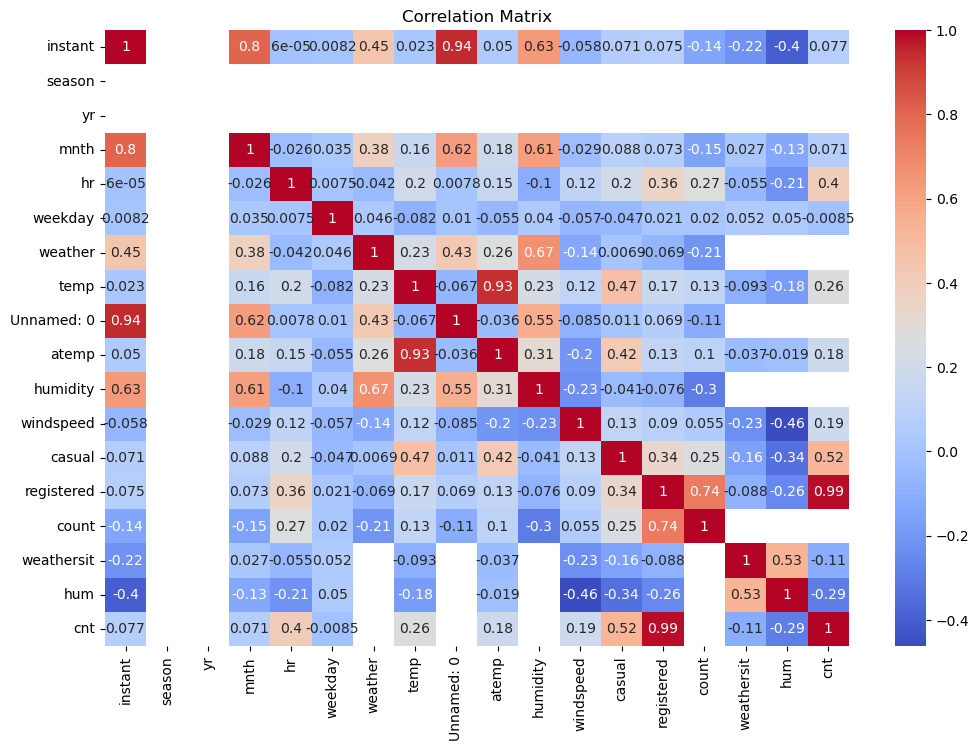

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_final_data = final_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_final_data.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()